In [1]:
#Overfitting means model fit to training data too well, often also learning the noise which is random & uninformative.
 # Overfit model will not generalize, which means it won't have good performance on other data cases beyond the one used for training.
    
#Regularlization is a way of preventing overfitting. It can reduce variance in a model, but in return will add bias, it's a trade off.
 # An overfit model typically has high variance w/ low bias.
 # Mean square error = deltax = bias^2 + variance^2 + irreducible error

#Import the packages to be used

import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
#Load data previously prepared in data preparation step.

Features = np.array(pd.read_csv('Auto_Data_Features.csv'))
Labels = np.array(pd.read_csv('Auto_Data_Labels.csv'))
print(Features.shape)
print(Labels.shape)

(195, 45)
(195, 1)


In [9]:
#Above- There are 195 cases w/ 45 features

#Below- Create randomly sampled training & test data (Bernoulli sample of 40 cases each) sets from sklearn.model_selection.

nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)

x_train = Features[indx[0], :]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1], :]
y_test = np.ravel(Labels[indx[1]])

Mean Square Error      = 0.02103483180293401
Root Mean Square Error = 0.14503389880622397
Mean Absolute Error    = 0.11896679673181162
Median Absolute Error  = 0.09769580826159974
R^2                    = 0.9271178345990492


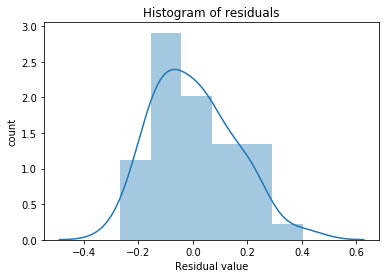

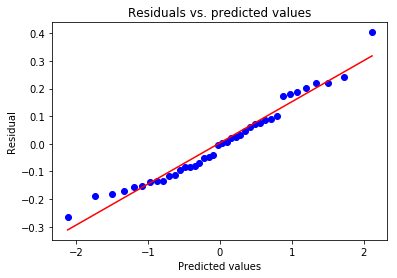

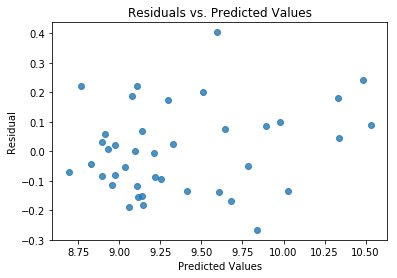

In [4]:
#First create baseline w/ all 45 features & no regularization (overfit model)

lin_mod = linear_model.LinearRegression()  #Define & train linear regression model using training features & labels
lin_mod.fit(x_train, y_train)

def print_metrics(y_true, y_predicted):
    r2 = sklm.r2_score(y_true, y_predicted)  #Compute R^2 & thus adjusted R^2
    
    ## Print performance metrics & R^2
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    
 #plot residuals of model vs. predicted values (pv) using test partition   
def resid_plot(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))  #Compute vector of residuals 
    sns.regplot(y_score, resids, fit_reg= False)  #Make residual plots
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    plt.show()

 #plot histogram of residuals of model using test parition
def hist_resids(y_test, y_score): 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))  #Compute vector of residuals
    sns.distplot(resids)  #Make residual plots
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
 #plot q-q normal plot of residuals of model using test parition
def resid_qq(y_test, y_score):
    resids = np.subtract(y_test, y_score)  #Compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)  #Make residual plots
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    

y_score = lin_mod.predict(x_test)
print_metrics(y_test, y_score)
hist_resids(y_test, y_score)
resid_qq(y_test, y_score)
resid_plot(y_test, y_score)

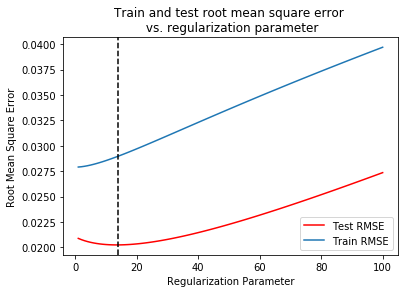

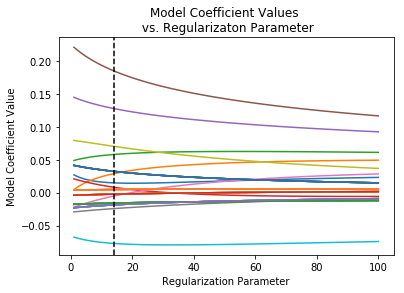

(14, 0.020249281682184823)


In [5]:
#Above- Distribution is slightly skewed & error metrics are fairly small

#Below- l2 regularization (Ridge Regression) applies a pentalty proportional to the l2 or Eucldian norm of model weights to loss function.
 # Which is SSE + regularization term = loss function for linear regression using squared error as metric
 #l2 is a soft constraint, meaning coefficients are driven close to, but likely not exactly to 0
 # Measures distance 'as the corw flies'


def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   #Make plot of RMSE vs regularization parameter
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization Parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)  #Make plot of values of regression coefficients vs regularization parameter
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model Coefficient Values \n vs. Regularizaton Parameter')
    plt.xlabel('Regularization Parameter')
    plt.ylabel('Model Coefficient Value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:  #Loops of l2 grid/list, each time computing a penalized l2 reg model & RMSE then saving to a list
        lin_mod = linear_model.Ridge(alpha = reg)  #define l2 regularized linear reg model from scikit-learn Linear_model package
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))  #lowest RMSE value of regularlization parameter is saved 
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and Test Root Mean Square Error \n vs. Regularization Parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,101)]  #grid of ~100 l2 penalty parameters created
out_l2 = test_regularization_l2(x_train, y_train, x_test, y_test, l2) 
print(out_l2)  #print x value where test RMSE is at min and what min value is

Mean Square Error      = 0.020249281682184823
Root Mean Square Error = 0.14229997077366116
Mean Absolute Error    = 0.11685808644799404
Median Absolute Error  = 0.1164291802395363
R^2                    = 0.9298396340585149


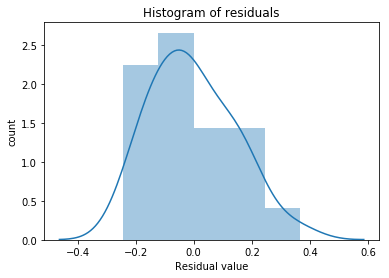

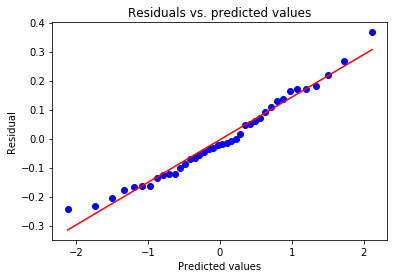

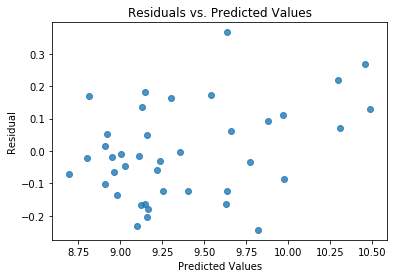

In [6]:
#Above- In top plot, point w/ lowest RMSE is shown w/ dotted line at 14.0. Min variance dominates bias to left of dotted line
 # & min bias dominates variance to right of dotted line. As bias grows, RMSE also changes dramatically. Smooth curve.
 # In bottom plot, there is high variance & bias(regularization penalty) is small to left of dotted line. Variance decreases as 
 # lines cluster & higher bias is introduced tot he right od dotted line.
    
#Below- Evaluate the Ridge regression model by computing w/ training data and showing results for test data.

lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(x_train, y_train)
y_score_l2 = lin_mod_l2.predict(x_test)

print_metrics(y_test, y_score_l2)
hist_resids(y_test, y_score_l2)
resid_qq(y_test, y_score_l2)
resid_plot(y_test, y_score_l2)

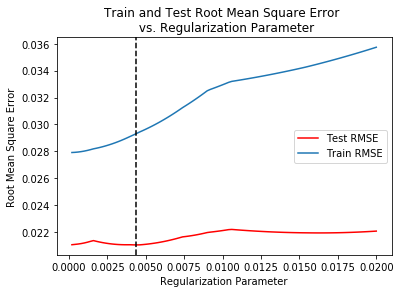

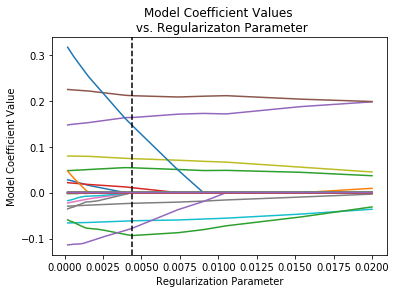

(0.0044, 0.021018078779791803)


In [7]:
#Above- The metrics for l2 regularized model is somewhat better, indicating this one generalizes better as well. Distrib also look more normal.

#Below- l1 (Lasso method or Manhatten norm) limits the sum of absolute values of model coefficients
 #  the loss function = SSE + penality error. Knocking out some weights free of the model altogether (to zero)
 #l1 is a hard constraint, meaning some coefficients are driven exactly to 0 
# Measures distance as if you were traveling on rectangular grid of streets.

def test_regularization_l1(x_train, y_train, x_test, y_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = linear_model.Lasso(alpha = reg)  #Define l1 regularlized linear reg model w/ Lasso function of scikit-learn package
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l1 = l1[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and Test Root Mean Square Error \n vs. Regularization Parameter'
    plot_regularization(l1, train_RMSE, test_RMSE, coefs, min_l1, title)
    return min_l1, min_RMSE
    
l1 = [x/5000 for x in range(1,101)]  #make grid of 100 regularization values
out_l1 = test_regularization_l1(x_train, y_train, x_test, y_test, l1)
print(out_l1) #print x value where test RMSE is at min and what min value is

Mean Square Error      = 0.021018078779791803
Root Mean Square Error = 0.14497613175896162
Mean Absolute Error    = 0.11890258840732541
Median Absolute Error  = 0.1101290249507727
R^2                    = 0.9271758810153483


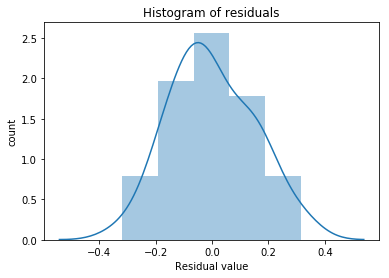

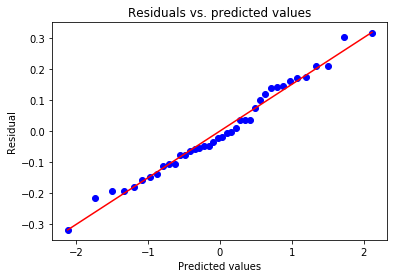

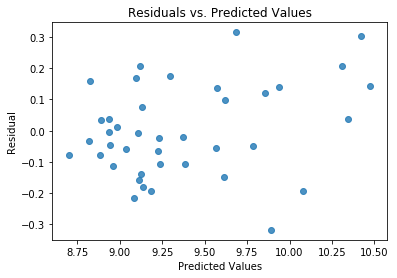

In [8]:
#Above- In top plot, point w/ lowest RMSE is shown w/ dotted line at 0.0044. Min variance dominates bias to left of dotted line
 # & min bias dominates variance to right of dotted line. As bias grows, RMSE also changes dramatically. Some kinks & bends are shown.
 # In bottom plot, there is high variance & bias(regularization penalty) is small to left of dotted line. Variance decreases as 
 # lines cluster & higher bias is introduced tot he right od dotted line. Many coeff driven to 0 as regularization penalty increases.
 # Kinks & bends in RMSE account for coefficients driven to zero

#Below- Evaluate the l1 regression (lasso) model by computing w/ training data and showing results for test data.

lin_mod_l1 = linear_model.Lasso(alpha = out_l1[0])
lin_mod_l1.fit(x_train, y_train)
y_score_l1 = lin_mod_l1.predict(x_test)

print_metrics(y_test, y_score_l1) 
hist_resids(y_test, y_score_l1)  
resid_qq(y_test, y_score_l1) 
resid_plot(y_test, y_score_l1) 

In [ ]:
#Above- The metrics for l1 regularized model is somewhat better than un-regularized but l2 is better than l1, but the residuals are closer to unregulated model.

##Summary
 #Explored basics of regularization which can prevent models from overfitting.
 #Also helps to generalize models for production, when considering variance-bias trade off.
 # l2 & l1 regularization both use the constraint of coefficients  to prevent over fitting.
    #l2 drives coefficients cloes to, but not, 0, whereas, l1 can drive coefficients to exactly 0.
 # Both l2 & l1 is an example of finding the best performing model for the problem at hand, or model selection.
  # Select optimal hyperparameters, which determine characteristics of the model but are distinct from model parameters or regression coefficients.
  # Select which features are best for the model, feature selection
  # Comparing diff types of models
  # Model selection is a component of model training, however, poor model selection can lead to over fit models